<a href="https://colab.research.google.com/github/anabellatus/machine_learning/blob/main/ML_Tugas_JS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Jobsheet 7 Machine learning

### Nama : Ana Bellatus Mustaqfiro
### NIM : 2241720095
### Kelas : TI-3F / 04

## Tugas

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik
4. Buatlah implementasi model SOM untuk segmentasi citra lain

Import Library

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

1. Gunakan data 'Mall_customers.csv'

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/UniLife/Semester5/ML/Jobsheet7/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

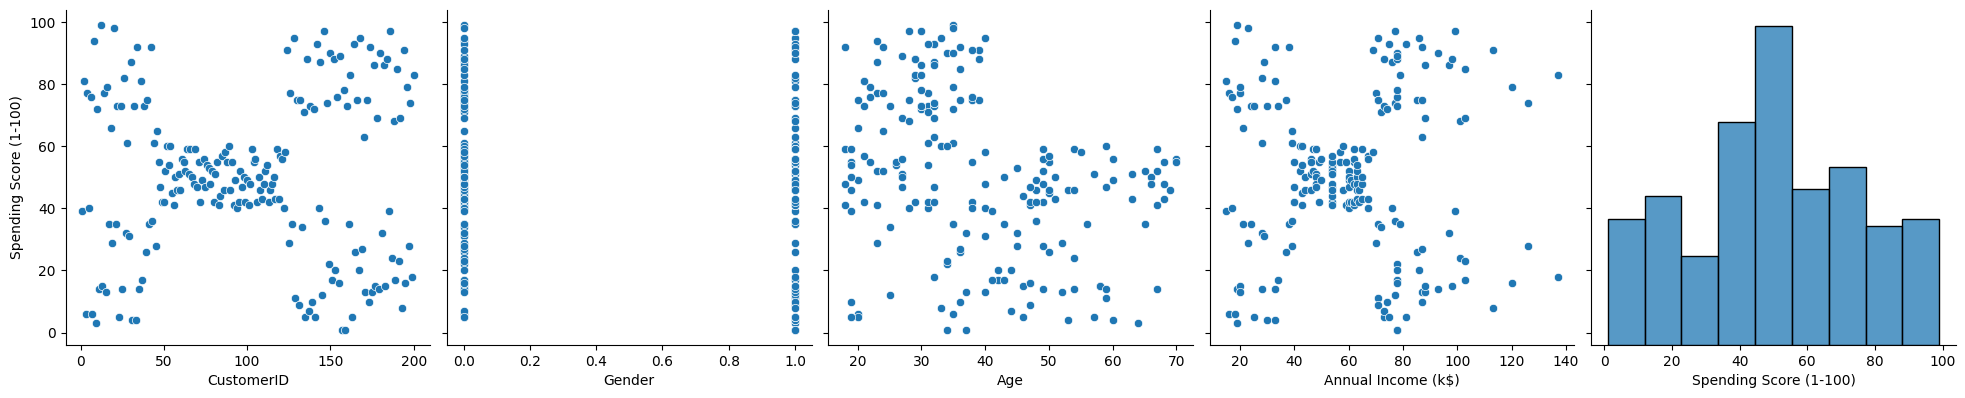

In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()

In [6]:
X = df.iloc[:, 1:]

X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Dengan menggunakan **Annual Income** dan **Spending Score**

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik

Memisahkan fitur

In [8]:
df_train = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(df_train)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Visualisasi fitur

Text(0, 0.5, 'Spending Score')

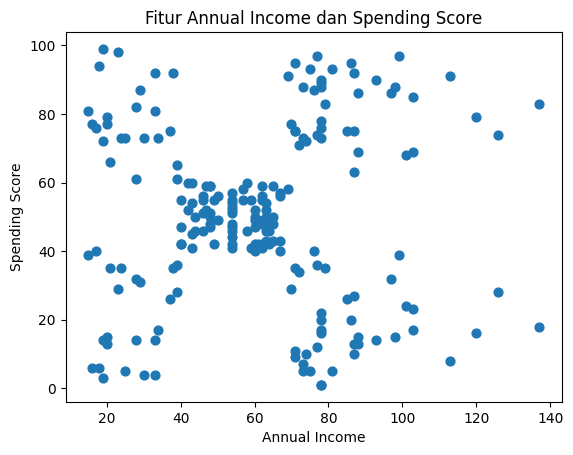

In [9]:
plt.title("Fitur Annual Income dan Spending Score")
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

Membuat Model K-Means

In [10]:
cl_kmeans = KMeans(n_clusters=2)

y_kmeans = cl_kmeans.fit_predict(df_train)

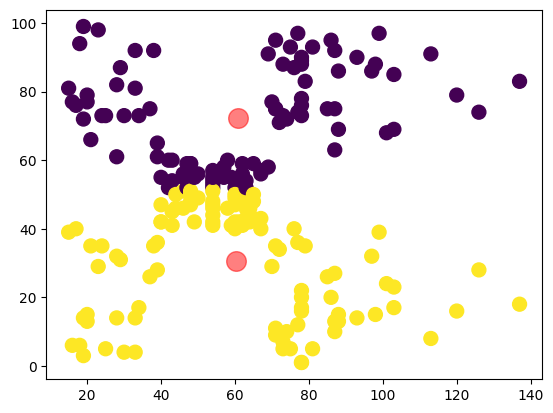

In [11]:
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [12]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 183116.4295463669


Menggunakan Metode Elbow untuk mencari Jumlah k Terbaik

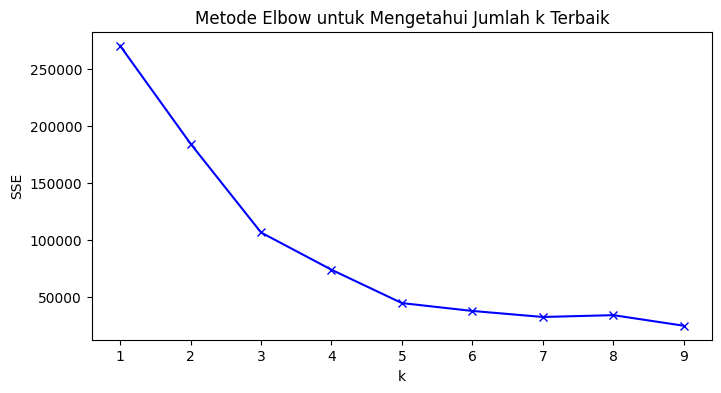

In [13]:
sse = []

K = range(1,10)

for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(df_train)
 sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [14]:
# Cek Nilai SSE pada setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=184131.8850278851
k=3; SSE=106348.37306211119
k=4; SSE=73679.78903948837
k=5; SSE=44448.45544793369
k=6; SSE=37564.94305477131
k=7; SSE=32277.023173884925
k=8; SSE=33878.94901035827
k=9; SSE=24615.514436840025


Menggunakan Metode Silhoutte untuk Mencari Jumlah k Terbaik

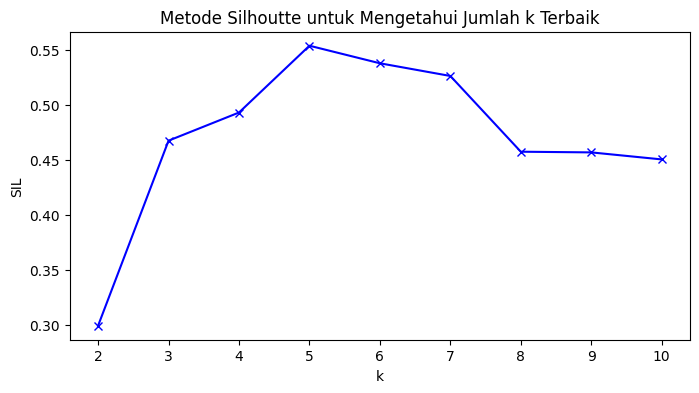

In [15]:
sil = []
kmax = 10
K = range(2, kmax+1)

for k in K:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(df_train)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_train, labels, metric='euclidean'))

plt.figure(figsize=(8, 4))
plt.plot(K, sil, "bx-")
plt.xlabel("k")
plt.ylabel("SIL")
plt.title("Metode Silhoutte untuk Mengetahui Jumlah k Terbaik")
plt.show()

Re-Train model dengan jumlah k terbaik pada metode Silhoutte

In [16]:
cl_kmeans = KMeans(n_clusters=4, n_init=10)
y_kmeans = cl_kmeans.fit_predict(df_train)

Text(0, 0.5, 'Spending Score')

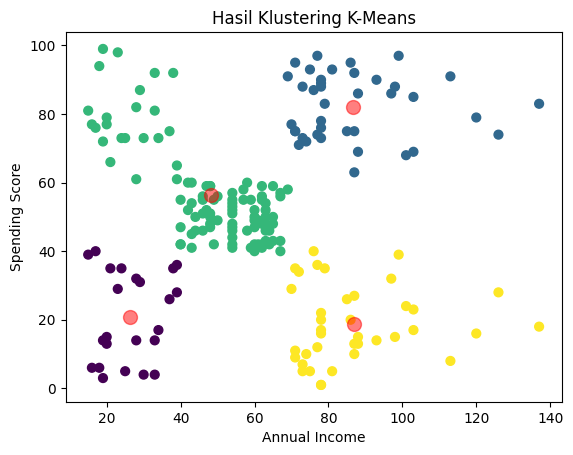

In [17]:
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], s=40, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")


4. Buatlah implementasi model SOM untuk segmentasi citra lain

In [18]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=76a1d3fd0713e01d80b53ac654fcfc935ff60b54c283fb7b518cf1ef21ed3734
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [19]:
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io

In [20]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [21]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [22]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [23]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [24]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah channel warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update train parameter dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [27]:
lilty_path = '/content/drive/MyDrive/UniLife/Semester5/ML/Jobsheet7/lily.jpg'

lily = io.imread(lilty_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [28]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(lily, num_epochs, initial_learning_rate, initial_neighborhood_radius)

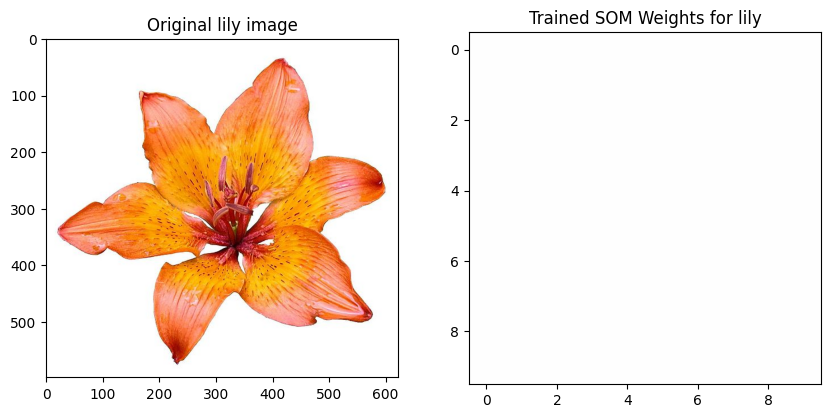

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(lily)
axes[0].set_title('Original lily image')

axes[1].imshow(trained_weights)
axes[1].set_title('Trained SOM Weights for lily')

plt.show()